#Implementation of Naive Bayes Algorithm


Here, we will be using the Naive Bayes Classifier to train our dataset and test the results using both Gaussian Naive Bayes classifier and Multinomial Naïve Bayes classifier. Let us begin by importing the libraries.

#Importing the Libraries

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.5 MB/s eta 0:00:00


In [181]:
import numpy as np  #used for linear algebra
import pandas as pd  #this is used for data processing and the input output of CSV file
import matplotlib.pyplot as plt  #this is used for data visualization purposes
import seaborn as sns  #it is used for statistical data visualization
from sklearn.model_selection import train_test_split  #for spliting the dataset into test and train set
import category_encoders as ce   #for encoding the categorical data variables'
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB   #for training a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import MultinomialNB   #for training a Multinomial Naive Bayes classifier on the training set
from sklearn.preprocessing import RobustScaler  #for feature scaling
from sklearn.metrics import accuracy_score   #for calculating the accuracy scores
from sklearn.metrics import confusion_matrix   #for confusion matrix
from sklearn.metrics import classification_report, roc_curve   #for roc curve
%matplotlib inline

We will now be importing the dataset.

#Importing the dataset

In [83]:
dataset = pd.read_csv('adult.csv')

We will now be exploring the database to see how it is and to figure out its characteristics

#Exploratory Data Analysis

In [84]:
dataset.shape   #tells us the dimensions of the dataset

(32560, 15)

In [85]:
dataset.head()   #this will show us the first 5 rows of the dataset

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


As we can see, the names of the columns are a little distorted, we will now be changing the names of the columns of the dataset.

In [86]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'income']
dataset.columns = col_names   #changing the names of the columns for the dataset
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Now, as we can see, the data is more self-explanatory, the data has proper columns and column names. We will now see the summary of the dataset.

In [87]:
dataset.info()   #seeing the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We will now look at how many categorical data values we have in our dataset.

In [88]:
#finding out the categorical values in the dataset
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


We will now see the variables available in these categorical data.

In [89]:
dataset[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


From all this data explortion we have found out that there are 9 categorical features that are workclass, education, marital_status, occupation, relationship, race, sex, native_country and income. We have also found out that income is the target feature. We will now see how if the categorical features have any null values.

In [90]:
dataset[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

As we can see, there are no null values in the categorical features of the dataset. We will now see the frequency of different variables of the categorical dataset.

In [91]:
for var in categorical:
  print(dataset[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

The description of all the categorical features is given above, it shows how much of each variable in each feature exists. Next, we will make it a little more understandable by seeing the frequency distribution of it.

In [92]:
for var in categorical:
  print(dataset[var].value_counts()/len(dataset))

 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name:

We have done this to see if there are any blanks in the categorical data. Since it was not shown in the null count, we cross checked with this method. Here, we can see that there are certain '?' in the list. We will replace them in the further steps.

In [93]:
dataset.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Here, we can see that a value called '?' exists. We will be replacing it.

In [94]:
dataset.workclass.value_counts()  #check frequency distribution of values in workclass variable

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

We can see that there are 1863 values encoded as ? in workclass variable. I will replace these ? with NaN.

In [95]:
dataset['workclass'] = dataset['workclass'].replace(r'\?', np.NaN, regex=True)

In [96]:
dataset.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

We will now do it similarly for occupation variable and native_country variable.

In [97]:
dataset.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Here, we can see that a value called '?' exists. We will be replacing it.

In [98]:
dataset.occupation.value_counts()  #check frequency distribution of values in occupation variable

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

We can see that there are 1843 values encoded as ? in occupation variable. I will replace these ? with NaN.

In [99]:
dataset['occupation'] = dataset['occupation'].replace(r'\?', np.NaN, regex=True)
dataset.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

The ? has been removed. We will move onto native country variable.

In [100]:
dataset.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Here, we can see that a value called '?' exists. We will be replacing it.

In [101]:
dataset.native_country.value_counts()  #check frequency distribution of values in occupation variable

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

We can see that there are 583 values encoded as ? in native_country variable. I will replace these ? with NaN.

In [102]:
dataset['native_country'] = dataset['native_country'].replace(r'\?', np.NaN, regex=True)
dataset.native_country.value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

The ? has been removed. All the ? have been replaced with null values so that they can be dealt with later. Now we can see how many null values exist.

In [103]:
dataset[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Here, we can see that some variables have null values now. We will check the number of labels for the categorical data.

In [104]:
for var in categorical:
  print(var, ' contains ', len(dataset[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


We can see that native_country column contains relatively large number of labels as compared to other columns. We will now be exploring numerical data.

In [105]:
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [106]:
dataset[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [107]:
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


From all this data explortion we have found out that there are 6 numberical features that are age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week. All the numerical values are discrete values. We will now see if any of them have a null value or missing value.

In [108]:
dataset[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

As we can see, there are no null values in the numerical values. We will now be splitting our dataset into training set and testing set.

#Split data into separate training and test set

In [109]:
X = dataset.drop(['income'], axis=1)
y = dataset['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((22792, 14), (9768, 14))

We will now be Feature Enginnering.


Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [110]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [111]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical  #displaying the categorical features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [112]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical   #displaying all the numerical features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

Earlier, we saw that we had some null values in the categorical data, we will be dealing with that first

In [113]:
X_train[categorical].isnull().mean()  #printing percentage of missing values in the categorical variables in training set

workclass         0.057213
education         0.000000
marital_status    0.000000
occupation        0.057389
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018252
dtype: float64

In [114]:
for col in categorical:
  if X_train[col].isnull().mean()>0:
    print(col, (X_train[col].isnull().mean()))  #print categorical variable with null values

workclass 0.057213057213057215
occupation 0.05738855738855739
native_country 0.018252018252018252


In [115]:
#here, we are replacing the null values with the most frequent values
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)
X_train[categorical].isnull().sum()  #chekcing if there are any null values remaining

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [116]:
X_test[categorical].isnull().sum() #checking missing data in the test set

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [117]:
#checking both testing and training set for missing values
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [118]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

We have dealt with the missing values in the categorical variables. We will now be encoding the categorical data.

In [119]:
categorical   #printing the categorical variables

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [120]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
20721,Self-emp-inc,Some-college,Married-civ-spouse,Transport-moving,Husband,Black,Male,Haiti
32097,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25205,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Bachelors,Never-married,Farming-fishing,Not-in-family,White,Male,United-States
12367,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Male,India


In [121]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

Here, we have used one hot encoding for the different categorical data, it will change the data significantly. We will be seeing the changed version of the dataset now.

In [122]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
20721,32,1,0,0,0,0,0,0,0,343872,...,0,0,0,0,0,0,0,0,0,0
32097,45,0,1,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25205,47,0,0,1,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,37,0,1,0,0,0,0,0,0,61778,...,0,0,0,0,0,0,0,0,0,0
12367,24,0,1,0,0,0,0,0,0,108495,...,0,0,0,0,0,0,0,0,0,0


In [123]:
X_train.shape  #shows how the shape of the dataset has changed (columns have been added due to the one hot encoding)

(22792, 105)

We can see that the initial 15 columns have been changed to 105 columns.

In [124]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,40,1,0,0,0,0,0,0,0,193524,...,0,0,0,0,0,0,0,0,0,0
8950,46,0,1,0,0,0,0,0,0,188027,...,0,0,0,0,0,0,0,0,0,0
7838,33,0,1,0,0,0,0,0,0,202498,...,0,0,0,0,0,0,0,0,0,0
16505,21,0,1,0,0,0,0,0,0,184756,...,0,0,0,0,0,0,0,0,0,0
19140,59,0,1,0,0,0,0,0,0,106748,...,0,0,0,0,0,0,0,0,0,0


In [125]:
X_test.shape

(9768, 105)

We are now done with the feature engineering, we will move onto the Feature Scaling

#Feature Scaling

We will be using the Standard Scaler to scale our data.

In [126]:
cols = X_train.columns
scaler = RobustScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)
X_train_Scaled = pd.DataFrame(X_train_Scaled, columns = [cols])
X_test_Scaled = pd.DataFrame(X_test_Scaled, columns = [cols])

This has encoded our data, we will see the encoded data below.

In [127]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
20721,32,1,0,0,0,0,0,0,0,343872,...,0,0,0,0,0,0,0,0,0,0
32097,45,0,1,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25205,47,0,0,1,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,37,0,1,0,0,0,0,0,0,61778,...,0,0,0,0,0,0,0,0,0,0
12367,24,0,1,0,0,0,0,0,0,108495,...,0,0,0,0,0,0,0,0,0,0


In [128]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,40,1,0,0,0,0,0,0,0,193524,...,0,0,0,0,0,0,0,0,0,0
8950,46,0,1,0,0,0,0,0,0,188027,...,0,0,0,0,0,0,0,0,0,0
7838,33,0,1,0,0,0,0,0,0,202498,...,0,0,0,0,0,0,0,0,0,0
16505,21,0,1,0,0,0,0,0,0,184756,...,0,0,0,0,0,0,0,0,0,0
19140,59,0,1,0,0,0,0,0,0,106748,...,0,0,0,0,0,0,0,0,0,0


In [129]:
X_train_Scaled.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.25,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.374471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.066379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.582591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.974966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.585881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
X_test_Scaled.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.15,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.197029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.600431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have finished the feature scaling, now we will be applying the Naive Bayes Classifier.

#Train Gaussian Naive Bayes Classifier

We will train the model with both the Gaussian Naive Bayes Classifier and the Multinomial Naive Bayes Classifier.

In [131]:
gnb = GaussianNB()
gnb.fit(X_train_Scaled, y_train)
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

#Train Multinomial Naïve Bayes Classifier

We will now train the multinomial naive bayes classifier separately.

In [132]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

We have trained both our models, we have trained the Gaussian Model using the scaled dataset and we have trained the Multinomial Model using the original dataset as it requires discrete data. We will now checking its accuracy.

#Check accuracy score

In [133]:
y_pred_gnb = gnb.predict(X_test_Scaled)
y_pred_gnb

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [137]:
print('Gaussian Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gnb)))

Gaussian Model accuracy score: 0.8164


In [135]:
y_pred_model = model.predict(X_test)
y_pred_model

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [138]:
print('Multinomial Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_model)))

Multinomial Model accuracy score: 0.7876


We will now compare the accuracy of the training set and the seting set.

In [139]:
y_pred_train_gnb = gnb.predict(X_train_Scaled)
y_pred_train_gnb

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [140]:
print('Training-set accuracy score with Gaussian Model: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gnb)))

Training-set accuracy score with Gaussian Model: 0.8089


In [141]:
y_pred_train_model = model.predict(X_train)
y_pred_train_model

array([' <=50K', ' >50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [142]:
print('Training-set accuracy score with Multinomial Model: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_model)))

Training-set accuracy score with Multinomial Model: 0.7804


Thus, as we can see, the accuracy score is better for the testing set for both the models. We will now check for overfitting and underfitting.

In [143]:
print('Gaussian Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gnb)))
print('Training-set accuracy score with Gaussian Model: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gnb)))

Gaussian Model accuracy score: 0.8164
Training-set accuracy score with Gaussian Model: 0.8089


In [144]:
print('Multinomial Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_model)))
print('Training-set accuracy score with Multinomial Model: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_model)))

Multinomial Model accuracy score: 0.7876
Training-set accuracy score with Multinomial Model: 0.7804


Since the accuracy for both the models for training and testing set is close to each other, we can say that there is no case for underfitting or overfitting. We will now move onto the confusion matrix.

#Confusion matrix

In [146]:
cm1 = confusion_matrix(y_test, y_pred_gnb)
print('Confusion matrix\n\n', cm1)
print('\nTrue Positives(TP) = ', cm1[0,0])
print('\nTrue Negatives(TN) = ', cm1[1,1])
print('\nFalse Positives(FP) = ', cm1[0,1])
print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix

 [[6105 1349]
 [ 444 1870]]

True Positives(TP) =  6105

True Negatives(TN) =  1870

False Positives(FP) =  1349

False Negatives(FN) =  444


In [147]:
cm2 = confusion_matrix(y_test, y_pred_model)
print('Confusion matrix\n\n', cm2)
print('\nTrue Positives(TP) = ', cm2[0,0])
print('\nTrue Negatives(TN) = ', cm2[1,1])
print('\nFalse Positives(FP) = ', cm2[0,1])
print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix

 [[7139  315]
 [1760  554]]

True Positives(TP) =  7139

True Negatives(TN) =  554

False Positives(FP) =  315

False Negatives(FN) =  1760


We will now be visalizing the confusion matrix onto the heatmap.

<Axes: >

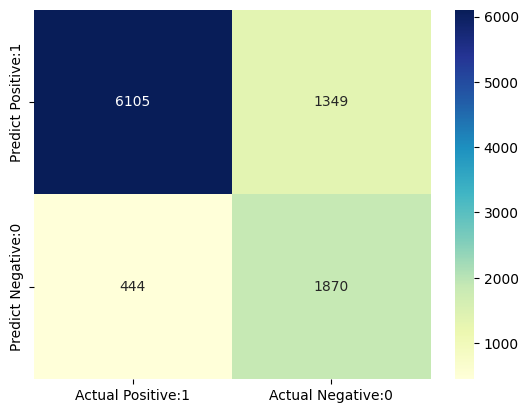

In [149]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGnBu')

<Axes: >

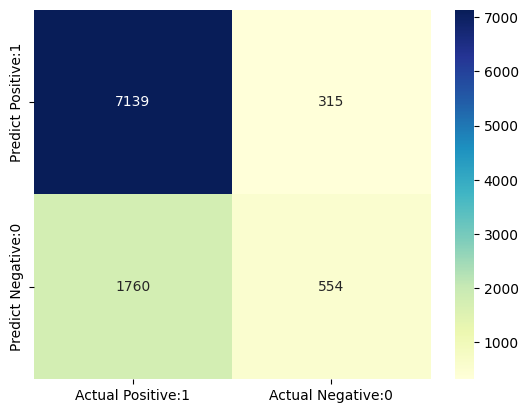

In [150]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGnBu')

We are done with the confusion matrix. Thus, we will now be moving onto the ROC.

#ROC (high precision and low recall/low precision and high recall)

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels. The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


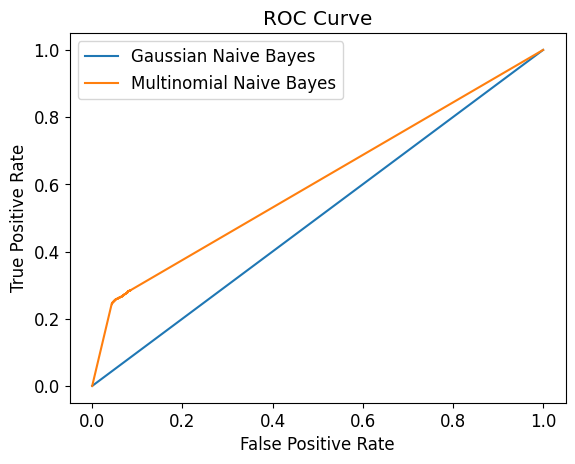

In [184]:
gnb_prob = gnb.predict_proba(X_test)[:, 1]
model_prob = model.predict_proba(X_test)[:, 1]

gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_prob, pos_label = ' >50K')
mnb_fpr, mnb_tpr, _ = roc_curve(y_test, model_prob, pos_label = ' >50K')

plt.figure()
plt.plot(gnb_fpr, gnb_tpr, label='Gaussian Naive Bayes')
plt.plot(mnb_fpr, mnb_tpr, label='Multinomial Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Conclusion

In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year. The model yields a very good performance as indicated by the accuracy score which was found to be 0.8164. I also make a Multinomial Naive Bayes Classifier model to predict the same. This model yields a good performance as was indicated by the accuracy score tat was found to be 0.7876.

There are also no sighs of overfitting or underfitting as both the accuracy scores of training set and testing sets were comparable for both Gaussian and Multinomial Naive Bayes Classifier.